In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, KFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC

In [4]:
data = pd.read_csv('data_2.csv')

In [7]:
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [9]:
data.describe().T

count      mean  \
Bankrupt?                                           6819.0  0.032263   
 ROA(C) before interest and depreciation before...  6819.0  0.505180   
 ROA(A) before interest and % after tax             6819.0  0.558625   
 ROA(B) before interest and depreciation after tax  6819.0  0.553589   
 Operating Gross Margin                             6819.0  0.607948   
...                                                    ...       ...   
 Liability to Equity                                6819.0  0.280365   
 Degree of Financial Leverage (DFL)                 6819.0  0.027541   
 Interest Coverage Ratio (Interest expense to E...  6819.0  0.565358   
 Net Income Flag                                    6819.0  1.000000   
 Equity to Liability                                6819.0  0.047578   

                                                         std  min       25%  \
Bankrupt?                                           0.176710  0.0  0.000000   
 ROA(C) before interest and depreciation before...  0.060686  0.0  0.476527   
 ROA(A) before interest and % after tax             0.065620  0.0  0.535543   
 ROA(B) before interest and depreciation after tax  0.061595  0.0  0.527277   
 Operating Gross Margin                             0.016934  0.0  0.600445   
...                                                      ...  ...       ...   
 Liability to Equity                                0.014463  0.0  0.276944   
 Degree of Financial Leverage (DFL)                 0.015668  0.0  0.026791   
 Interest Coverage Ratio (Interest expense to E...  0.013214  0.0  0.565158   
 Net Income Flag                                    0.000000  1.0  1.000000   
 Equity to Liability                                0.050014  0.0  0.024477   

                                                         50%       75%  max  
Bankrupt?                                           0.000000  0.000000  1.0  
 ROA(C) before interest and depreciation before...  0.502706  0.535563  1.0  
 ROA(A) before interest and % after tax             0.559802  0.589157  1.0  
 ROA(B) before interest and depreciation after tax  0.552278  0.584105  1.0  
 Operating Gross Margin                             0.605997  0.613914  1.0  
...                                                      ...       ...  ...  
 Liability to Equity                                0.278778  0.281449  1.0  
 Degree of Financial Leverage (DFL)                 0.026808  0.026913  1.0  
 Interest Coverage Ratio (Interest expense to E...  0.565252  0.565725  1.0  
 Net Income Flag                                    1.000000  1.000000  1.0  
 Equity to Liability                                0.033798  0.052838  1.0  

[96 rows x 8 columns]

In [10]:
##查看数据标签的分布情况
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [13]:
##对列名的空白字符进行剔除
data.columns = data.columns.str.strip()

In [14]:
##查看在线收入标识和bankrupt之间的相关性
pd.crosstab(data['Bankrupt?'],data['Net Income Flag'],normalize='index')

Net Income Flag    1
Bankrupt?           
0                1.0
1                1.0

In [18]:
##查看数值型变量和目标变量的相关性，使用方差分析
X = data.loc[:,~data.columns.isin(['Bankrupt?','Net Income Flag'])]
y = data.iloc[:,0]

corr_feature_label = pd.concat([pd.DataFrame(X.columns,columns = ['特征']),pd.DataFrame(f_classif(X,y)[1],columns = ['相关性'])],axis=1)
corr_feature_label.sort_values(by = '相关性',ascending=True,inplace=True)

In [21]:
##查看P值大于等于0.05的特征  (与目标变量的相关性较弱)
low_corr_feature = corr_feature_label[corr_feature_label['相关性']>=0.05]['特征'].values

In [22]:
##删除相关性较小的特征
data.drop(low_corr_feature,axis = 1,inplace=True)

In [24]:
##删除Net Income Flag特征
data.drop(['Net Income Flag'],axis=1,inplace=True)

In [25]:
##降维
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()   ##初始化PCA算法
# 拟合数据
pca.fit(data.loc[:,data.columns!='Bankrupt?'])
# 获取解释方差比率
js_std = pca.explained_variance_ratio_ * 100
# 查看累计解释方差比率与主成分个数的关系
plt.figure(figsize=(14,8))  ##设置图片大小
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(np.arange(1, len(js_std) + 1), np.cumsum(js_std), "-r*")

plt.title("累计解释方差比例", fontsize=15)

plt.xlabel("主成分个数")
plt.ylabel('累计解释方差')

Text(0, 0.5, '累计解释方差')

In [26]:
##选取10个主成分，由上图可以看到解释方差以及达到95%以上，这些主成分已经能够解释原始数据的95%信息。

pca = PCA(n_components=10)

res = pca.fit_transform(data.loc[:,data.columns!='Bankrupt?'])

In [27]:
res.shape

(6819, 10)

In [35]:
##数据集平衡
label = data['Bankrupt?'].values
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=922)

os_features,os_labels = smote.fit_resample(res,label)

In [37]:
os_features.shape,os_labels.shape

((13198, 10), (13198,))

In [38]:
##训练集和测试集划分

xtrain,xtest,ytrain,ytest = train_test_split(os_features,os_labels,test_size=0.3,random_state=922,stratify=os_labels)

In [39]:
##模型的构建
svm_model = SVC(probability=True)

##模型训练
svm_model.fit(xtrain,ytrain)

##模型预测
svm_predict = svm_model.predict(xtest)
svm_predict_proba = svm_model.predict_proba(xtest)[:,1]

In [40]:
##模型评估
print(classification_report(ytest,svm_predict))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      1980
           1       0.76      0.74      0.75      1980

    accuracy                           0.75      3960
   macro avg       0.75      0.75      0.75      3960
weighted avg       0.75      0.75      0.75      3960



Text(0.5, 1.0, 'SVM算法在测试集上的ROC_AUC曲线')

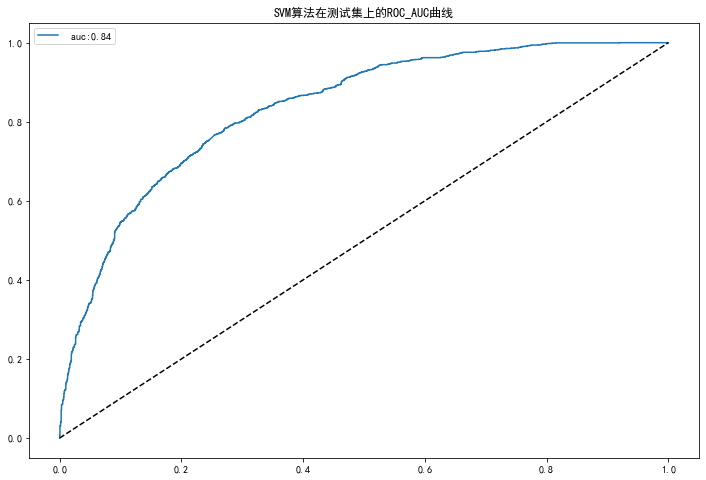

In [45]:
##可视化roc_auc曲线
fpr, tpr, _ = roc_curve(ytest, svm_predict_proba)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr,label = ' auc:{:.2f}'.format(roc_auc_score(ytest, svm_predict_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.title('SVM算法在测试集上的ROC_AUC曲线')